In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Задача 1

Менеджер сайта, предоставляющего независимым продавцам площадку для
продаж, решил провести АБ-тест, выбрав в качестве метрики время обработки
заказов продавцами. Для контрольной группы продавцов оставили предыдущий
интерфейс работы с заказами, а для тестовой группы внедрили интерактивный
дэшборд заказов.
Полученные результаты времени обработки заказов в часах для тестовой и
контрольной групп представлены в csv-файлах time_order_processing_test.csv и
time_order_processing_control.csv.
Проверьте гипотезу менеджера о том, что использование интерактивного
дэшборда уменьшило время обработки заказов.
Подсказка: это независимые выборки.

H0: mu_control - mu_test = 0

H1: mu_control - mu_test > 0

In [ ]:
control = pd.read_csv('/time_order_processing_control.csv')
test = pd.read_csv('/time_order_processing_test.csv')

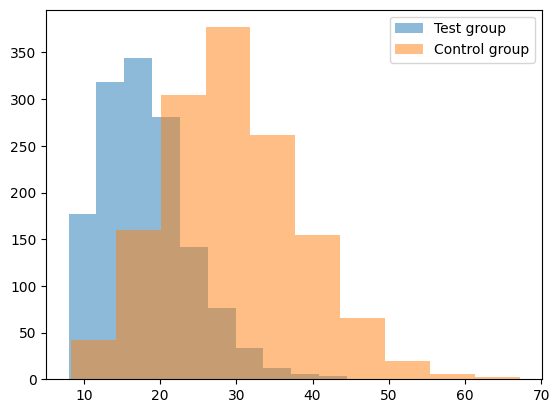

In [ ]:
plt.hist(test['time'], alpha=0.5, label='Test group')
plt.hist(control['time'], alpha=0.5, label='Control group')
plt.legend(loc='upper right')
plt.show()

In [ ]:
scipy.stats.ttest_ind(control['time'], test['time'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='greater', trim=0)

Ttest_indResult(statistic=40.01055525962125, pvalue=2.9949647128013707e-277)

P_value < 1%, нулевая гипотеза отвергается при 1% уровне значимости. В тестовой группе сократилось время обработки заказов.

#Задача 2

Этот же маркетплейс предоставил с 1 мая часто заказывающим клиентам
бесплатную доставку, действующую для всех заказов до конца календарного
месяца, если в этом месяце клиент уже сделал пять заказов (то есть начиная с шестого заказа).
В файле clients_orders.csv представлена информация о количестве заказов,
которое тысяча случайно отобранных часто заказывающих клиентов сделали в
апреле и мае.
Проверьте гипотезу о том, что клиенты стали делать больше заказов после
введения бесплатной доставки с шестого заказа.
Подсказка: это зависимая (парная) выборка.

H0: mu_may - mu_april = 0

H1: mu_may - mu_april > 0

In [ ]:
orders = pd.read_csv('/clients_orders.csv')
orders['diff'] = orders['orders_may'] - orders['orders_april']

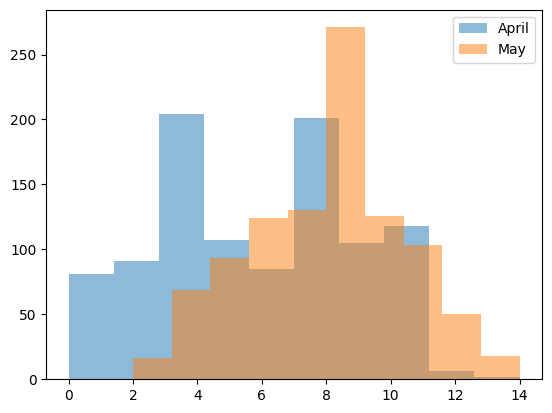

In [ ]:
plt.hist(orders['orders_april'], alpha=0.5, label='April')
plt.hist(orders['orders_may'], alpha=0.5, label='May')
plt.legend(loc='upper right')
plt.show()

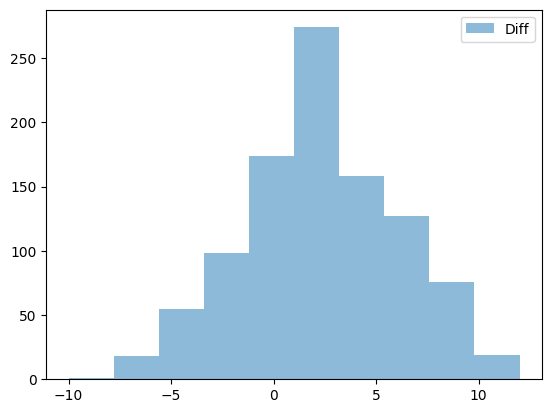

In [ ]:
plt.hist(orders['diff'], alpha=0.5, label='Diff')
plt.legend(loc='upper right')
plt.show()

In [ ]:
scipy.stats.mstats.ttest_onesamp(orders['diff'], popmean=0, axis=0, alternative='greater')

Ttest_1sampResult(statistic=18.171999762294778, pvalue=2.8066025158955254e-64)

In [ ]:
t_stat, p_value = ttest_rel(orders['orders_may'], orders['orders_april'], alternative='greater')
print(p_value)

2.8066025158955254e-64


P_value < 1%, нулевая гипотеза отвергается при 1% уровне значимости. В мае увеличилось количество заказов.

#Задача 3

В файле vendors.csv представлена анонимизированная информация о
продавцах маркетплейса: тип продукции ( goods ) и время осуществления
продаж через этот маркетплейс ( experience ).
Проверьте гипотезу о том, что стаж продаж на маркетплейсе не зависит от типа реализуемой продукции.

H0: тип реализуемой продукции и стаж продаж независимы

H1: тип реализуемой продукции и стаж продаж зависимы

In [ ]:
vendors = pd.read_csv('/vendors.csv')
vendors

,Unnamed: 0,goods,experience
0,0,beauty,5-
1,1,beauty,1-3
2,2,electronics,3-5
3,3,outdoor,1-3
4,4,clothes,3-5
...,...,...,...
513,513,beauty,1-3
514,514,outdoor,1-3
515,515,outdoor,0-1
516,516,electronics,1-3


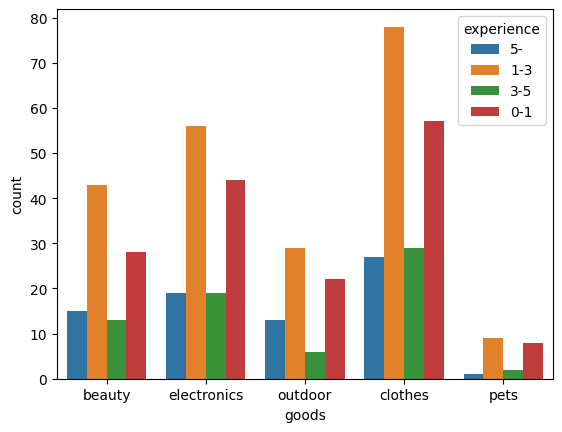

In [ ]:
sns.countplot(x='goods', hue='experience', data=vendors)
plt.show()

In [ ]:
data = pd.pivot_table(vendors, values = 'goods', index='goods', columns='experience', aggfunc='count')
data['Totals'] = data['0-1']+data['1-3']+data['3-5']+data['5-']
data.loc['Totals'] = data.sum()
data['goods_share'] = data['Totals'] / data.loc['Totals', 'Totals']
data.loc['exp_share'] = data.loc['Totals'] / data.loc['Totals', 'Totals']
data

experience,0-1,1-3,3-5,5-,Totals,goods_share
goods,,,,,,
beauty,28.00000,43.000000,13.000000,15.000000,99.0,0.191120
clothes,57.00000,78.000000,29.000000,27.000000,191.0,0.368726
electronics,44.00000,56.000000,19.000000,19.000000,138.0,0.266409
outdoor,22.00000,29.000000,6.000000,13.000000,70.0,0.135135
pets,8.00000,9.000000,2.000000,1.000000,20.0,0.038610
Totals,159.00000,215.000000,69.000000,75.000000,518.0,1.000000
exp_share,0.30695,0.415058,0.133205,0.144788,1.0,0.001931


Посчитаем ожидаемые значения, если переменные независимы:

In [ ]:
goods = set(vendors['goods'])
experience = set(vendors['experience'])
data_expected = data
data_expected = data_expected.drop(columns=['goods_share'])
data_expected = data_expected.drop(['exp_share'])
for i in goods:
  for j in experience:
    data_expected.loc[i,j] = data.loc[i, 'goods_share'] * data.loc['exp_share', j] * data.loc['Totals', 'Totals']
data_expected

NameError: ignored

Посчитаем статистику x-квадрат:

In [ ]:
sum_of_squares = 0

for i in goods:
  for j in experience:
    sum_of_squares += (data.loc[i, j] - data_expected.loc[i, j])**2

x_squared = sum_of_squares / (len(goods) * len(experience))
x_squared

3.0185805220554247

Критическое значение для x-квадрат при уровне статистической значимости 5% и количеством степеней свободы 12 равно 21.026.

Т.к. рассчитанная статистика меньше, чем критическое значение: 3.019 < 21.026, то H0 не отвергается --> нет оснований полагать, что переменные зависимы.

# Повторный тест с объединенными группами

Так как в некоторых ячейках ожидаемой таблицы есть значения меньше 5, то объединим две малые группы и проведем тест повторно:

In [ ]:
data_joined = pd.pivot_table(vendors, values = 'goods', index='goods', columns='experience', aggfunc='count')
data_joined.loc['outdoor + pets'] = data_joined.loc[['outdoor', 'pets']].sum()
data_joined = data_joined.drop(['outdoor', 'pets'])
data_joined['Totals'] = data_joined['0-1']+data_joined['1-3']+data_joined['3-5']+data_joined['5-']
data_joined.loc['Totals'] = data_joined.sum()
data_joined['goods_share'] = data_joined['Totals'] / data_joined.loc['Totals', 'Totals']
data_joined.loc['exp_share'] = data_joined.loc['Totals'] / data_joined.loc['Totals', 'Totals']
data_joined

experience,0-1,1-3,3-5,5-,Totals,goods_share
goods,,,,,,
beauty,28.00000,43.000000,13.000000,15.000000,99.0,0.191120
clothes,57.00000,78.000000,29.000000,27.000000,191.0,0.368726
electronics,44.00000,56.000000,19.000000,19.000000,138.0,0.266409
outdoor + pets,30.00000,38.000000,8.000000,14.000000,90.0,0.173745
Totals,159.00000,215.000000,69.000000,75.000000,518.0,1.000000
exp_share,0.30695,0.415058,0.133205,0.144788,1.0,0.001931


Посчитаем ожидаемые значения, если переменные независимы:

In [ ]:
goods_joined = set(vendors['goods'])
goods_joined.add('outdoor + pets')
goods_joined.remove('outdoor')
goods_joined.remove('pets')
experience = set(vendors['experience'])
data_joined_expected = data_joined
data_joined_expected = data_joined_expected.drop(columns=['goods_share'])
data_joined_expected = data_joined_expected.drop(['exp_share'])
for i in goods_joined:
  for j in experience:
    data_joined_expected.loc[i,j] = data_joined.loc[i, 'goods_share'] * data_joined.loc['exp_share', j] * data_joined.loc['Totals', 'Totals']
data_joined_expected

experience,0-1,1-3,3-5,5-,Totals
goods,,,,,
beauty,30.388031,41.090734,13.187259,14.333977,99.0
clothes,58.627413,79.276062,25.442085,27.654440,191.0
electronics,42.359073,57.277992,18.382239,19.980695,138.0
outdoor + pets,27.625483,37.355212,11.988417,13.030888,90.0
Totals,159.000000,215.000000,69.000000,75.000000,518.0


Посчитаем статистику x-квадрат:

In [ ]:
sum_of_squares = 0

for i in goods_joined:
  for j in experience:
    sum_of_squares += (data_joined.loc[i, j] - data_joined_expected.loc[i, j])**2

x_squared = sum_of_squares / (len(goods_joined) * len(experience))
x_squared

3.4850330197820534

Критическое значение для x-квадрат при уровне статистической значимости 5% и количеством степеней свободы 9 равно 15.507.

Т.к. рассчитанная статистика меньше, чем критическое значение: 3.485 < 15.507, то H0 не отвергается --> нет оснований полагать, что переменные зависимы.

Второй метод вычесления хи-квадрата

In [ ]:
# таблица сопряженности
table = pd.crosstab(vendors['goods'], vendors['experience'])
print(table)

#Найдем критерий хи-квадрат:
import scipy.stats as stats
from scipy.stats import chi2_contingency

alpha = 0.05
chi2, pvalue, dof, expected = stats.chi2_contingency(table)
print(chi2, pvalue)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

experience   0-1  1-3  3-5  5-
goods                         
beauty        28   43   13  15
clothes       57   78   29  27
electronics   44   56   19  19
outdoor       22   29    6  13
pets           8    9    2   1
5.086695539599919 0.9550203555576416
Не отвергаем нулевую гипотезу


#Задание 4 (дополнительное)

Постройте 90%-е доверительные интервалы по выборкам из задания 1 для
среднего времени обработки заказа продавцами, использующими и не
использующими интерактивный дашборд.

Формула для нахождения доверительного интервала:

x_sample_mean - SE * T < x < x_sample_mean + SE * T

где SE - estimated standard error (S/n**0.5),

T - значение t-статистики с (n-1) степенями свободы для alpha/2

In [ ]:
control_mean = control['time'].mean()
test_mean = test['time'].mean()
n_control = len(control['time'])
n_test = len(test['time'])
print('Выборочное среднее дя контрольной выборки = ', control_mean)
print('Выборочное среднее дя тестовой выборки = ', test_mean)
print('N для контрольной выборки = ', n_control)
print('N для тестовой выборки = ', n_control)

control['sq_sum'] = (control['time'] - control_mean)**2
test['sq_sum'] = (test['time'] - test_mean)**2

control_sq_sum = control['sq_sum'].sum()
test_sq_sum = test['sq_sum'].sum()

S_control = np.sqrt(control_sq_sum/(n_control-1))
S_test = np.sqrt(test_sq_sum/(n_test-1))

SE_control = S_control / np.sqrt(n_control)
SE_test = S_test / np.sqrt(n_test)

T = 1.645

Выборочное среднее дя контрольной выборки =  29.502828427853554
Выборочное среднее дя тестовой выборки =  18.009160086145013
N для контрольной выборки =  1393
N для тестовой выборки =  1393


In [ ]:
left_value_control = control_mean - SE_control * T
right_value_control = control_mean + SE_control * T
print(f'90.0% доверительный интервал для контрольной выборки = ({left_value_control:.5}, {right_value_control:.5})')

90.0% доверительный интервал для контрольной выборки = (29.107, 29.899)


In [ ]:
left_value_test = test_mean - SE_test * T
right_value_test = test_mean + SE_test * T
print(f'90.0% доверительный интервал для тестовой выборки = ({left_value_test:.5}, {right_value_test:.5})')

90.0% доверительный интервал для тестовой выборки = (17.751, 18.267)


In [ ]:

# доверительные интервалы
confidence = 0.90
control_interval = stats.t.interval(confidence, len(control)-1, loc=control.mean(), scale=stats.sem(control))
test_interval = stats.t.interval(confidence, len(test)-1, loc=test.mean(), scale=stats.sem(test))
print("Доверительный интервал для контрольной группы:", control_interval)
print("Доверительный интервал для тестовой группы:", test_interval)

Доверительный интервал для контрольной группы: (array([678.25985587,  29.10681334,  75.27963703]), array([713.74014413,  29.89884351,  85.88135257]))
Доверительный интервал для тестовой группы: (array([678.25985587,  17.75082781,  31.7533183 ]), array([713.74014413,  18.26749237,  36.82610441]))
